In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [2]:
# test= pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')
# test=pd.read_csv('/home/atif/dataset_26_april_3.csv')
test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [10]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [11]:
multivariate_data=test_new.loc[500:24999,['dateTime','AEDATZ_HO_V0','AEWIHO_T9AV2','AEWIHOAVABV2','RWWIHOA_HWT0',
                                          'AEWIHOAKZ_V0','AEDAHO_T9_V2']]
multivariate_data = multivariate_data.set_index('dateTime')
multivariate_data=multivariate_data.loc[::-1]
univariate_data=test_new.loc[500:24999,['dateTime','AEDAHO_T9_V2']]
univariate_data = univariate_data.set_index('dateTime')
univariate_data=univariate_data.loc[::-1]

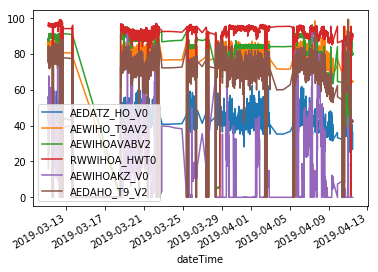

In [12]:
multivariate_data.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

# dropping zero from multivariate dataset

In [13]:
from numpy import nan
multivariate_data_drop_zero= multivariate_data.replace(0,nan)
multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

shape of multivariate_data:  (24500, 6)
shape of multivariate_data_drop_zero:  (13212, 6)


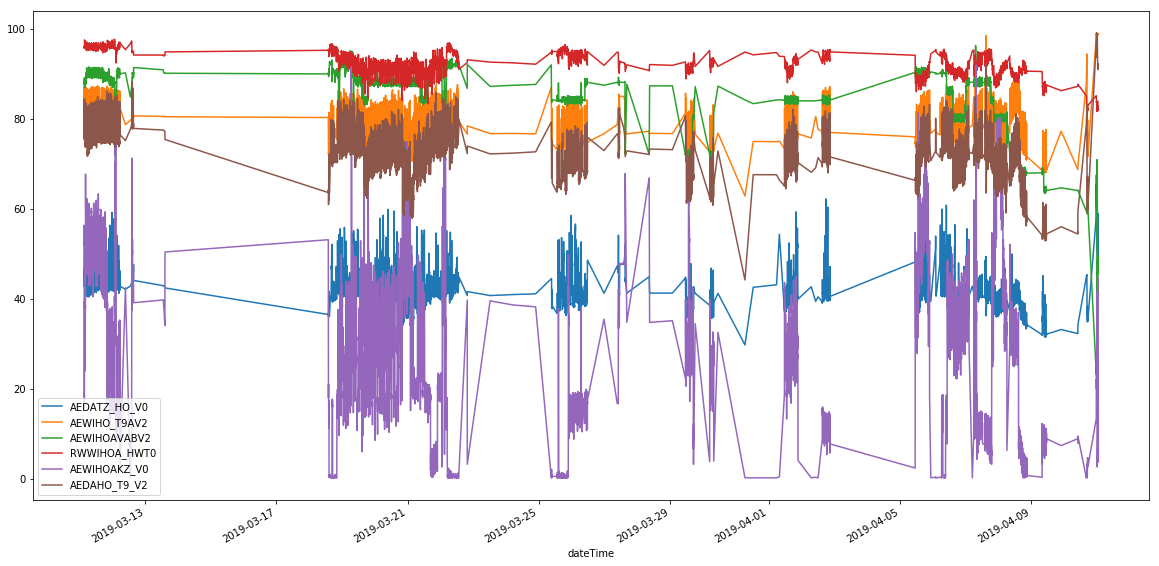

In [14]:
print('shape of multivariate_data: ',multivariate_data.shape)
print('shape of multivariate_data_drop_zero: ',multivariate_data_drop_zero.shape)

multivariate_data_drop_zero.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

shape of univariate_data:  (24500, 1)


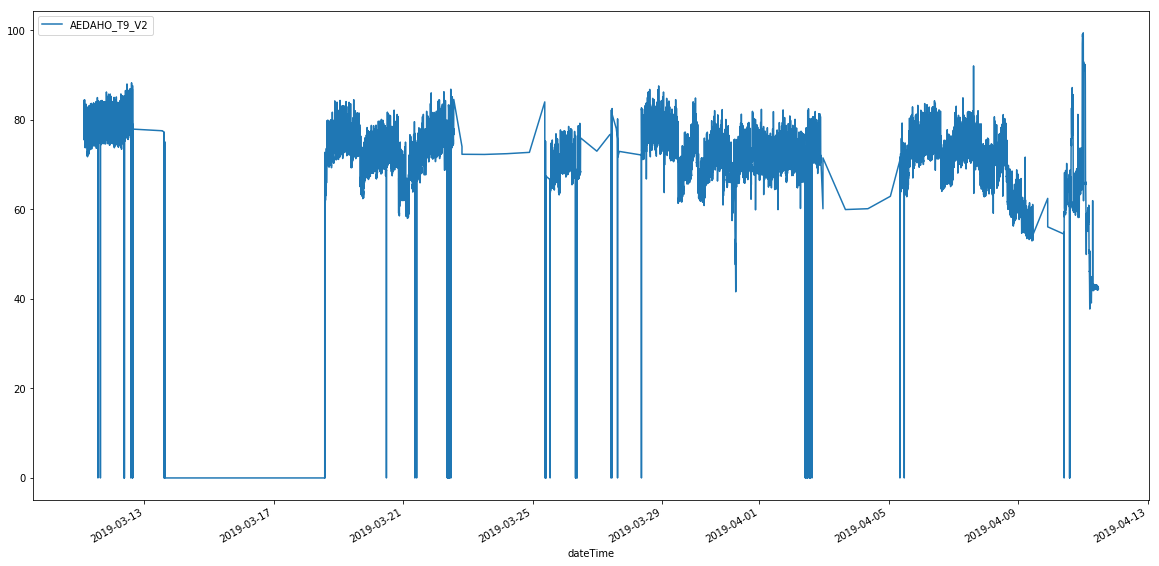

In [15]:
print('shape of univariate_data: ',univariate_data.shape)
univariate_data.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

# dropping zero from univariate dataset

In [16]:
from numpy import nan
univariate_data_drop_zero= univariate_data.replace(0,nan)
univariate_data_drop_zero= univariate_data_drop_zero.dropna(how='any',axis=0)

shape of univariate_data:  (24500, 1)
shape of univariate_data_drop_zero:  (24410, 1)


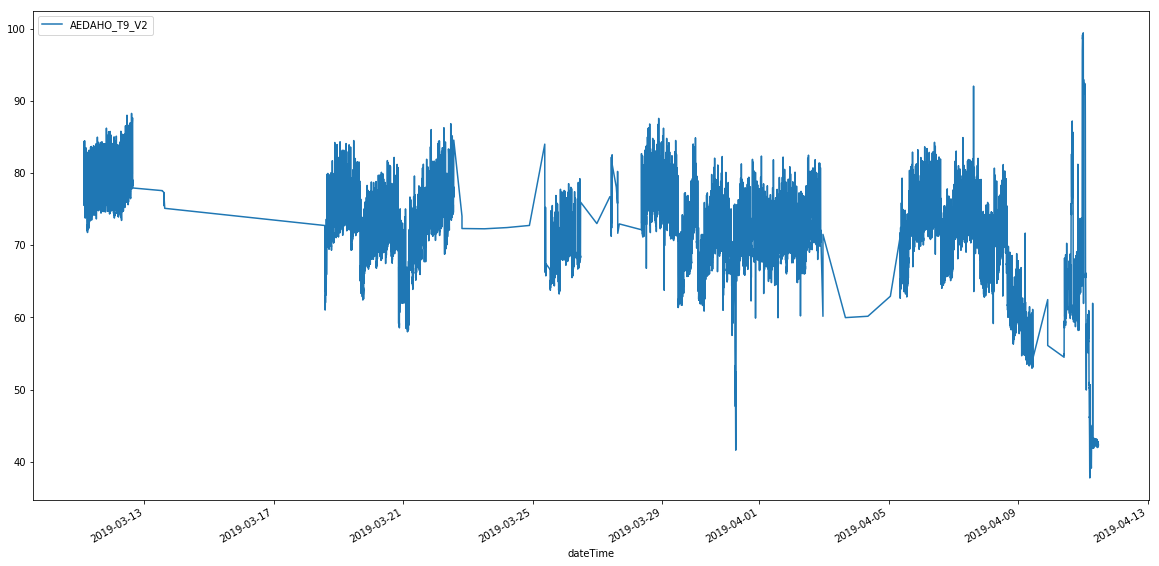

In [17]:
print('shape of univariate_data: ',univariate_data.shape)
print('shape of univariate_data_drop_zero: ',univariate_data_drop_zero.shape)

univariate_data_drop_zero.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [18]:
null_columns_multivariate=multivariate_data.columns[multivariate_data.isnull().any()]
multivariate_data[null_columns_multivariate].isnull().sum()

Series([], dtype: float64)

In [19]:
null_columns_univariate=univariate_data.columns[univariate_data.isnull().any()]
univariate_data[null_columns_univariate].isnull().sum()

Series([], dtype: float64)

In [14]:
# a=[1,2,3,4]
# b=[1,2]
# c=[1,2,3,4,5,6]

# d=[a,b,c]

# maxlen=max(map(len,d))
# print(maxlen)

In [15]:
# for i in d:
#     if len(i)<maxlen:
#         i.extend(0 for _ in range(maxlen-len(i)))

In [16]:
# print(d)

In [24]:
univariate_data.loc[univariate_data['AEDAHO_T9_V2']==0]

,AEDAHO_T9_V2
dateTime,
2019-03-11 13:43:00,0.0
2019-03-11 15:33:00,0.0
2019-03-12 09:02:00,0.0
2019-03-12 09:06:00,0.0
2019-03-12 09:12:00,0.0
2019-03-12 09:20:00,0.0
2019-03-12 14:04:00,0.0
2019-03-12 15:12:00,0.0
2019-03-12 15:20:00,0.0


In [20]:
# multivariate_data.loc[multivariate_data['AEDATZ_HO_V0','AEWIHO_T9AV2','AEWIHOAVABV2','RWWIHOA_HWT0',
#                                           'AEWIHOAKZ_V0','AEDAHO_T9_V2']==0]

In [21]:
univariate_data[['AEDAHO_T9_V2']].idxmin()

AEDAHO_T9_V2   2019-03-11 13:43:00
dtype: datetime64[ns]

In [20]:
univariate_data.describe()

,AEDAHO_T9_V2
count,24500.000000
mean,69.896877
std,8.144866
min,0.000000
25%,67.082395
50%,70.707651
75%,74.210937
max,99.451639


In [21]:
multivariate_data.describe()

,AEDATZ_HO_V0,AEWIHO_T9AV2,AEWIHOAVABV2,RWWIHOA_HWT0,AEWIHOAKZ_V0,AEDAHO_T9_V2
count,24500.000000,24500.000000,24500.000000,24500.000000,24500.000000,24500.000000
mean,41.615423,76.911482,79.975928,88.588305,17.272872,69.896877
std,5.526882,6.223244,17.490315,19.479071,20.772134,8.144866
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.941772,75.140305,80.190114,90.488923,0.000000,67.082395
50%,41.088972,76.825217,84.254694,93.155966,7.700092,70.707651
75%,43.898990,78.395621,88.314583,95.072678,32.602018,74.210937
max,67.611019,99.037058,96.347428,99.308017,92.032283,99.451639


In [22]:
uni_mean=univariate_data.mean()
univariate_data_mean= univariate_data.replace(0,uni_mean)
# multivariate_data.std()

In [54]:
# from sklearn.preprocessing import Imputer

# imputer = Imputer(missing_values = 0, strategy = "mean")
# imputer_1 = imputer.fit(univariate_data['AEDAHO_T9_V2'])

In [23]:
univariate_data_mean.loc[univariate_data_mean['AEDAHO_T9_V2']==0]
# print(univariate_data)

,AEDAHO_T9_V2
dateTime,


24500


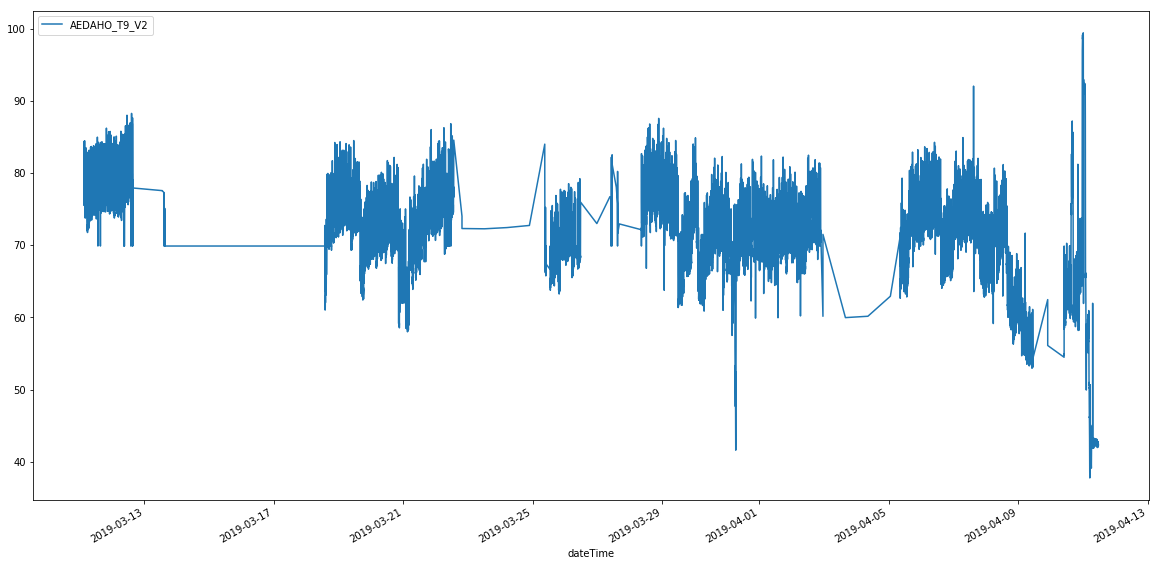

In [58]:
print(univariate_data_mean.size)
univariate_data_mean.plot()
plt.show()

# find max value from each column

In [9]:
# finding max value from each column
max_val_array=[]
for idx,val in enumerate(list(test.columns)):
    x=test[val].max()
    q=[val,x]
    max_val_array.append(q)
max_val_array=np.array(max_val_array)
for i in max_val_array:
    print(i)

['row ID' 'Row9999']
['longTime' '1555311120000']
['AEAGHOAWE2T1' '98.67343689926952']
['AEAGHOAWE2A0' '100.0']
['AEAGHOAWE2T0' '98.68047251105995']
['AEAGHOAWE1A0' '100.0']
['AEAGHOAWE1T1' '95.32436459606436']
['AEAGHOAWE1T0' '71.79520644194703']
['AEAGHOAWE3T0' '99.32869318959595']
['AEAGHOAWE3A0' '100.0']
['AEAGHOAWE3T1' '95.40444935956188']
['AEAGHOAWE_A2' '100.0']
['AEAGHOAWE_A1' '100.0']
['AEAGHOAWE_A0' '97.79370330347851']
['AEAGHOAWE_T3' '89.41684665226782']
['AEAGTHHPF2T0' '98.90628952682538']
['AEAGHOA_S2G0' '0.27899650081395344']
['AEAGHOAWE_T2' '94.91172570223551']
['AEAGHOAWE_T1' '97.35716108565063']
['AEAGHOB_GHA0' '94.87926780568053']
['AEAGHOB_GHT0' '97.93192589401121']
['AEAGHOBWE2T0' '99.12758236943931']
['AEAGHOBWE2A0' '100.0']
['AEAGHOBWE2T2' '100.0']
['AEAGHOBWE1T0' '98.249156936261']
['AEAGHOBWE1T2' '100.0']
['AEAGHOBWE1A0' '100.0']
['AEAGHOBWE3T0' '99.25435756395004']
['AEAGHOBWE3T2' '100.0']
['AEAGHOBWE3A0' '100.0']
['AEAGHOBWE_T1' '100.0']
['AEAGHOBWE_T2' '100.

['DEKOSG_SSSG1' '100.0']
['DEKOSG_SSAG1' '0.0']
['DEKOSG_SAUG2' '89.55223880597015']
['DEKOSG_SSVG2' '100.0']
['DEKOSG_SAUG1' '89.55223880597015']
['DEKOSG_SSVG1' '100.0']
['DEKOSG_SSZG1' '100.0']
['DEKOSG_SSEG1' '0.0']
['DEKOSG_DRMG2' '100.0']
['DEKOSG_DRZG2' '89.55223880597015']
['DEKOSG_DRAG2' '100.0']
['DEKOSG___EG2' '100.0']
['DEKOSG___SG2' '100.0']
['DEKOSG___VG2' '100.0']
['DEKOSG___AG2' '89.55223880597015']
['DEKOSG___BG2' '96.77419354838707']
['DEKOSG__VWG2' '100.0']
['DEKOSG_DRMG1' '100.0']
['DEKOSG_DRAG1' '0.0']
['DEKOSG_DRZG1' '89.55223880597015']
['DEKOSG___SG1' '0.0']
['DEKOSG___EG1' '0.0']
['DEKOSG___AG1' '89.55223880597015']
['DEKOSG___VG1' '100.0']
['DEKOSG__VWG1' '0.0']
['DEKOSG___BG1' '100.0']
['DEKOSGRLCOA0' '100.0']
['DEKOSGRLCOA2' '100.0']
['DEKOSGRLCOA1' '100.0']
['DEKOSG___2P0' '0.0']
['DEKOSG___1P0' '0.0']
['DEKOSG____V0' '95.0']
['RWKOAUSSP_Q0' '90.88405074191813']
['RWKOGSOWEGS0' '89.4869171096343']
['AEKOKWA___V0' '95.56882873506882']
['AEKOKWA___G0' '99.788

# find the index where the column value is zero

In [46]:
for idx,val in enumerate(list(multivariate_data.columns)):
    print(val)
    for i, j in univariate_data.iterrows():
        for k in j:
            if k==0:
                print(i,'\t\t',k)


AEDATZ_HO_V0
2019-03-11 13:43:00 		 0.0
2019-03-11 15:33:00 		 0.0
2019-03-12 09:02:00 		 0.0
2019-03-12 09:06:00 		 0.0
2019-03-12 09:12:00 		 0.0
2019-03-12 09:20:00 		 0.0
2019-03-12 14:04:00 		 0.0
2019-03-12 15:12:00 		 0.0
2019-03-12 15:20:00 		 0.0
2019-03-12 15:24:00 		 0.0
2019-03-12 15:25:00 		 0.0
2019-03-13 14:35:00 		 0.0
2019-03-13 14:37:00 		 0.0
2019-03-13 14:38:00 		 0.0
2019-03-13 15:13:00 		 0.0
2019-03-13 15:16:00 		 0.0
2019-03-13 15:26:00 		 0.0
2019-03-18 13:53:00 		 0.0
2019-03-18 13:55:00 		 0.0
2019-03-18 13:56:00 		 0.0
2019-03-18 14:01:00 		 0.0
2019-03-20 11:38:00 		 0.0
2019-03-21 08:44:00 		 0.0
2019-03-21 10:03:00 		 0.0
2019-03-22 08:52:00 		 0.0
2019-03-22 08:56:00 		 0.0
2019-03-22 08:57:00 		 0.0
2019-03-22 09:19:00 		 0.0
2019-03-22 09:20:00 		 0.0
2019-03-22 09:32:00 		 0.0
2019-03-22 09:33:00 		 0.0
2019-03-22 10:05:00 		 0.0
2019-03-22 10:14:00 		 0.0
2019-03-22 10:18:00 		 0.0
2019-03-22 10:20:00 		 0.0
2019-03-22 10:36:00 		 0.0
2019-03-22 10:3

2019-03-22 11:28:00 		 0.0
2019-03-22 11:29:00 		 0.0
2019-03-25 09:11:00 		 0.0
2019-03-25 09:12:00 		 0.0
2019-03-25 09:14:00 		 0.0
2019-03-25 09:50:00 		 0.0
2019-03-25 09:56:00 		 0.0
2019-03-25 12:59:00 		 0.0
2019-03-25 13:01:00 		 0.0
2019-03-26 07:52:00 		 0.0
2019-03-26 08:00:00 		 0.0
2019-03-26 08:01:00 		 0.0
2019-03-26 09:04:00 		 0.0
2019-03-26 09:07:00 		 0.0
2019-03-26 09:09:00 		 0.0
2019-03-26 09:10:00 		 0.0
2019-03-27 10:05:00 		 0.0
2019-03-27 10:06:00 		 0.0
2019-03-27 10:07:00 		 0.0
2019-03-27 10:50:00 		 0.0
2019-03-27 14:59:00 		 0.0
2019-03-27 15:00:00 		 0.0
2019-03-27 15:01:00 		 0.0
2019-03-28 08:43:00 		 0.0
2019-03-28 08:44:00 		 0.0
2019-04-02 10:12:00 		 0.0
2019-04-02 10:45:00 		 0.0
2019-04-02 10:46:00 		 0.0
2019-04-02 10:54:00 		 0.0
2019-04-02 11:48:00 		 0.0
2019-04-02 11:50:00 		 0.0
2019-04-02 11:57:00 		 0.0
2019-04-02 11:58:00 		 0.0
2019-04-02 13:12:00 		 0.0
2019-04-02 13:23:00 		 0.0
2019-04-02 13:28:00 		 0.0
2019-04-02 13:33:00 		 0.0
2